In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv("C:/ObesityDataSet_raw_and_data_sinthetic.csv")

In [27]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [28]:
df.shape

(2111, 17)

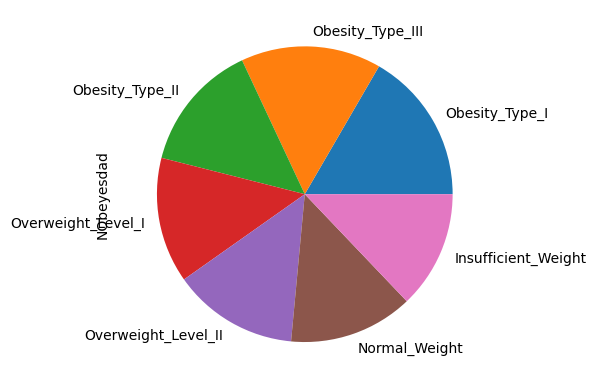

In [29]:
target_count = df['NObeyesdad'].value_counts().plot(kind='pie')

In [30]:
target_count

<AxesSubplot: ylabel='NObeyesdad'>

In [31]:
target_unique = df['NObeyesdad'].unique()

In [32]:
target_unique

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [33]:
options1 = ['Obesity_Type_I', 'Obesity_Type_II','Obesity_Type_III'] 
df_ot = df[df["NObeyesdad"].isin(options1)]

In [34]:
df_ot.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
10,26.0,Male,1.85,105.0,Sometimes,yes,3.0,3.0,no,no,3.0,yes,2.0,2.0,Frequently,Public_Transportation,Obesity_Type_I
13,41.0,Male,1.80,99.0,Frequently,yes,2.0,3.0,no,no,2.0,no,2.0,1.0,Sometimes,Automobile,Obesity_Type_I
17,29.0,Female,1.53,78.0,no,yes,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Obesity_Type_I
21,52.0,Female,1.69,87.0,no,yes,3.0,1.0,no,yes,2.0,yes,0.0,0.0,Sometimes,Automobile,Obesity_Type_I
23,22.0,Female,1.60,82.0,Sometimes,yes,1.0,1.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I


In [35]:
df_ot.shape

(972, 17)

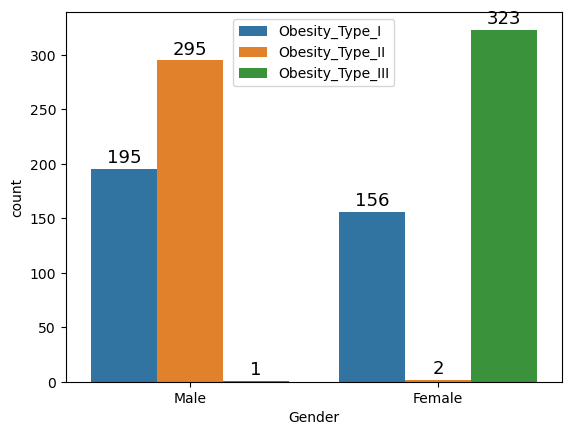

In [36]:
plots = sns.countplot(data=df_ot, x='Gender', hue='NObeyesdad')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    plt.legend()

In [37]:
df_ot.groupby(["NObeyesdad","Gender"])["Gender"].count()

NObeyesdad        Gender
Obesity_Type_I    Female    156
                  Male      195
Obesity_Type_II   Female      2
                  Male      295
Obesity_Type_III  Female    323
                  Male        1
Name: Gender, dtype: int64

In [38]:
options = ['Overweight_Level_I', 'Overweight_Level_II'] 
df_ow = df[df["NObeyesdad"].isin(options)]

In [39]:
df_ow.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
11,21.0,Female,1.72,80.0,Sometimes,yes,2.0,3.0,yes,no,2.0,yes,2.0,1.0,Frequently,Public_Transportation,Overweight_Level_II
16,27.0,Male,1.93,102.0,Sometimes,yes,2.0,1.0,no,no,1.0,yes,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
18,30.0,Female,1.71,82.0,no,yes,3.0,4.0,no,yes,1.0,yes,0.0,0.0,Frequently,Automobile,Overweight_Level_II


In [40]:
df_ow.shape

(580, 17)

In [41]:
df_ow.groupby(["NObeyesdad","Gender"])["Gender"].count()

NObeyesdad           Gender
Overweight_Level_I   Female    145
                     Male      145
Overweight_Level_II  Female    103
                     Male      187
Name: Gender, dtype: int64

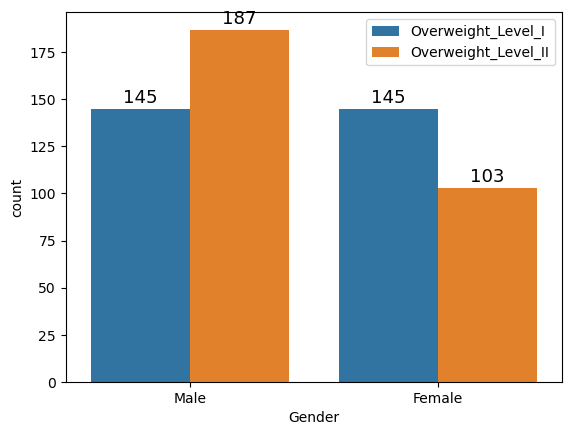

In [42]:
plots = sns.countplot(data=df_ow, x='Gender', hue='NObeyesdad')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    plt.legend()

In [43]:
categorical_features = ['Gender','CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
continuous_features = ['Age', 'Height', 'Weight','FCVC', "NCP", 'CH2O' ,'FAF', 'TUE']

In [44]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()

df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

In [45]:
df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,1
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,1
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,5
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,6
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,1
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,1
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,1
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,1
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,1


In [46]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,1
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,1
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,5
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,6


In [47]:
label_encoder = LabelEncoder()

df[categorical_features] = df[categorical_features].apply(label_encoder.fit_transform)

In [48]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


In [49]:
standard_scaler = StandardScaler()

df[continuous_features] = standard_scaler.fit_transform(df[continuous_features])

In [50]:
df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,-0.522124,0,-0.875589,-0.862558,3,0,-0.785019,0.404153,0,0,-0.013073,1,-1.188039,0.561997,2,3,1
1,-0.522124,0,-1.947599,-1.168077,2,0,1.088342,0.404153,1,1,1.618759,1,2.339750,-1.080625,2,3,1
2,-0.206889,1,1.054029,-0.366090,1,0,-0.785019,0.404153,0,0,-0.013073,1,1.163820,0.561997,2,3,1
3,0.423582,1,1.054029,0.015808,1,0,1.088342,0.404153,0,0,-0.013073,0,1.163820,-1.080625,2,4,5
4,-0.364507,1,0.839627,0.122740,2,0,-0.785019,-2.167023,0,0,-0.013073,0,-1.188039,-1.080625,2,3,6
5,0.738817,1,-0.875589,-1.282647,2,1,-0.785019,0.404153,0,0,-0.013073,0,-1.188039,-1.080625,2,0,1
6,-0.206889,0,-2.162001,-1.206267,2,1,1.088342,0.404153,0,0,-0.013073,1,-0.012109,-1.080625,2,2,1
7,-0.364507,1,-0.661187,-1.282647,2,0,-0.785019,0.404153,0,0,-0.013073,0,2.339750,-1.080625,2,3,1
8,-0.049271,1,0.839627,-0.862558,1,1,1.088342,0.404153,0,0,-0.013073,1,-0.012109,0.561997,2,3,1
9,-0.364507,1,0.196421,-0.709799,3,1,-0.785019,0.404153,0,0,-0.013073,1,-0.012109,0.561997,2,3,1


In [51]:
df.corr()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
Age,1.000000,0.048394,-0.025958,0.202560,-0.044487,0.063902,0.016291,-0.043944,-0.116283,0.091987,-0.045304,0.205725,-0.144938,-0.296931,0.083739,-0.601945,0.236170
Gender,0.048394,1.000000,0.618466,0.161668,0.007616,0.064934,-0.274505,0.067600,-0.102633,0.044698,0.107930,0.102512,0.189607,0.017269,0.091543,-0.137537,0.024908
Height,-0.025958,0.618466,1.000000,0.463136,-0.129732,0.178364,-0.038121,0.243672,-0.133753,0.055499,0.213376,0.247684,0.294709,0.051912,0.048818,-0.073609,0.038986
Weight,0.202560,0.161668,0.463136,1.000000,-0.206677,0.272300,0.216125,0.107469,-0.201906,0.025746,0.200575,0.496820,-0.051436,-0.071561,0.287493,0.004610,0.387643
CALC,-0.044487,0.007616,-0.129732,-0.206677,1.000000,-0.089520,-0.060781,-0.071747,-0.003463,-0.082471,-0.091386,0.036676,0.086799,0.045864,-0.047540,-0.012452,-0.134632
FAVC,0.063902,0.064934,0.178364,0.272300,-0.089520,1.000000,-0.027283,-0.007000,-0.190658,-0.050660,0.009719,0.208036,-0.107995,0.068417,0.150068,-0.069800,0.044582
FCVC,0.016291,-0.274505,-0.038121,0.216125,-0.060781,-0.027283,1.000000,0.042216,0.071852,0.014320,0.068461,0.040372,0.019939,-0.101135,-0.054670,0.064743,0.018522
NCP,-0.043944,0.067600,0.243672,0.107469,-0.071747,-0.007000,0.042216,1.000000,-0.015624,0.007811,0.057088,0.071370,0.129504,0.036326,-0.097801,-0.053858,-0.092616
SCC,-0.116283,-0.102633,-0.133753,-0.201906,-0.003463,-0.190658,0.071852,-0.015624,1.000000,0.047731,0.008036,-0.185422,0.074221,-0.010928,-0.109179,0.043157,-0.050679
SMOKE,0.091987,0.044698,0.055499,0.025746,-0.082471,-0.050660,0.014320,0.007811,0.047731,1.000000,-0.031995,0.017385,0.011216,0.017613,-0.055282,-0.010702,-0.023256


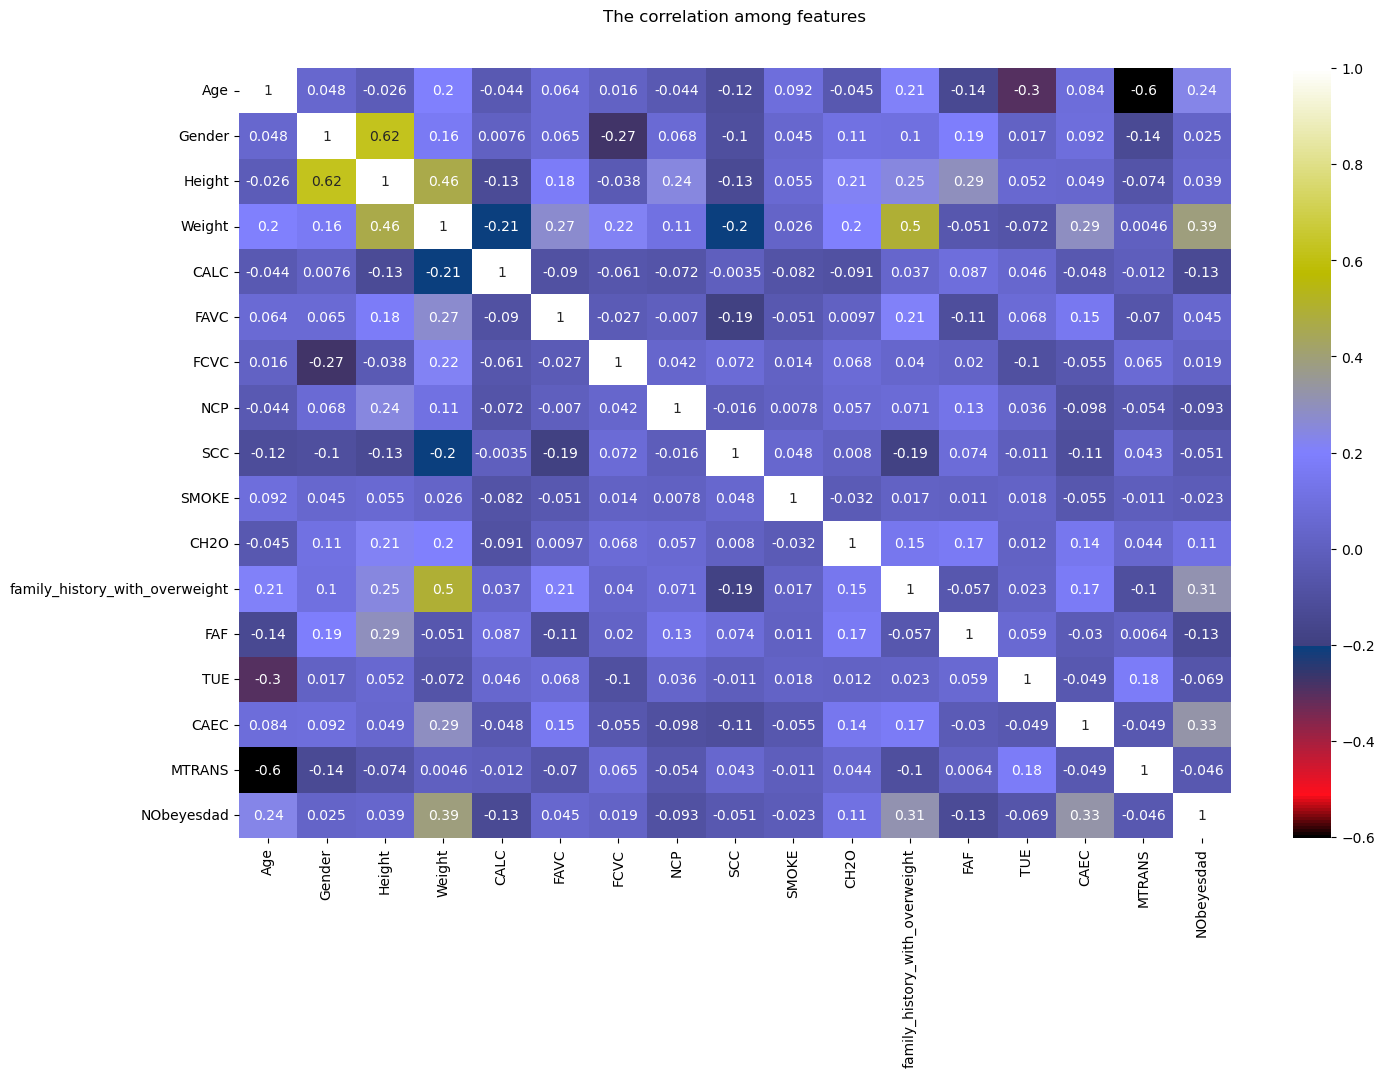

In [52]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot = True, cmap = "gist_stern")
plt.title('The correlation among features',y= 1.05)
plt.show()

In [53]:
X = df.drop('NObeyesdad',axis=1)
y = df['NObeyesdad']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25  0  0  0  0  0  0]
 [ 2 26  0  0  0  0  0]
 [ 0  0 36  0  0  0  1]
 [ 0  0  0 34  0  0  0]
 [ 0  0  0  0 25  0  0]
 [ 0  0  0  0  0 25  1]
 [ 0  0  0  0  0  3 34]]


0.9669811320754716